In [1142]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [1143]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [1144]:
# Import data set
day_data = pd.read_csv("day.csv")
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Cleaning

In [1145]:
# Check for null values, if any
day_data.info()
print("Shape: ", day_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
Shape:  (730, 16)


#### Since there are no null values, no need to drop rows or fill them with median or mode.

In [1146]:
# Check for duplicates
duplicate_rows = day_data.duplicated().sum()
if duplicate_rows == 0:
    print("No duplicate rows")
else:
    print("Duplicate rows")
    lender_data.drop_duplicates()

No duplicate rows


In [1147]:
# Drop "casual" and "registered" columns, as these columns are not involved in model building
# Similarly, lets also drop "instant" and "dteday" columns as they don't provide any meaningful information.
day_data = day_data.drop(["casual", "registered", "instant", "dteday"], axis = 1)

In [1148]:
# Convert weathersit and season to categorical string data for EDA and model building
col_list = ["weathersit", "season"]
col_data_dict = {
                    "weathersit": {"1": "Clear cloudy", "2": "Misty cloudy", "3": "Snowy cloudy", "4": "Rainy thunderstorm"},
                    "season": {"1": "spring", "2": "summer", "3": "fall", "4": "winter"}
                }

for col in col_list:
    day_data[col] = day_data[col].astype("str")
    day_data[col] = day_data[col].map(col_data_dict[col])

day_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Misty cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Misty cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [1149]:
# Check mean, median values
day_data.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,6.526027,0.028767,2.997260,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,3.450215,0.167266,2.006161,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,7.000000,0.000000,3.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Data Visualization

<Figure size 2000x1200 with 0 Axes>

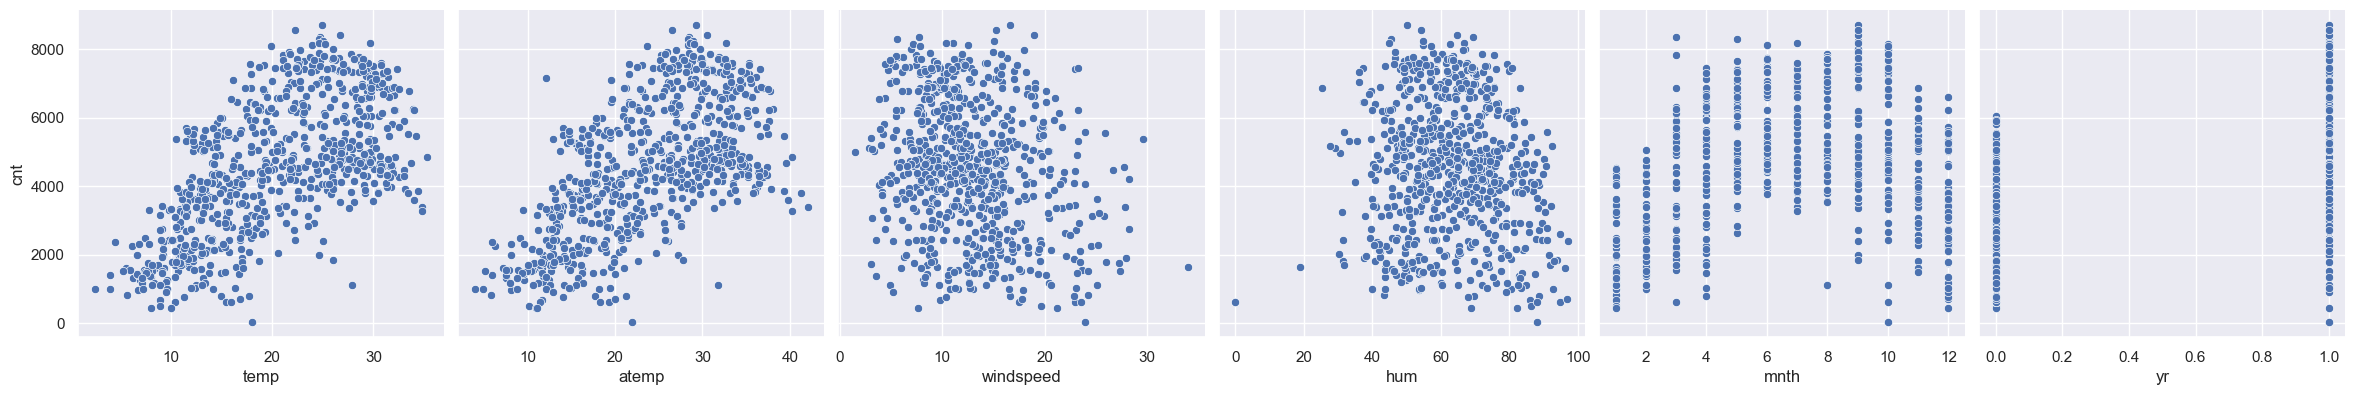

In [1150]:
# See relationships between numeric variables
plt.figure(figsize=(20, 12))
sns.pairplot(day_data, x_vars = ["temp", "atemp", "windspeed", "hum", "mnth", "yr"], y_vars = "cnt", size = 4, aspect = 1, kind='scatter')
plt.show()

The plots `[atemp, cnt]` and `[temp, cnt]` are very similar which leads us to believe 
that temp and atemp have a high correlation. Lets visualize the data between `temp` and `atemp`.

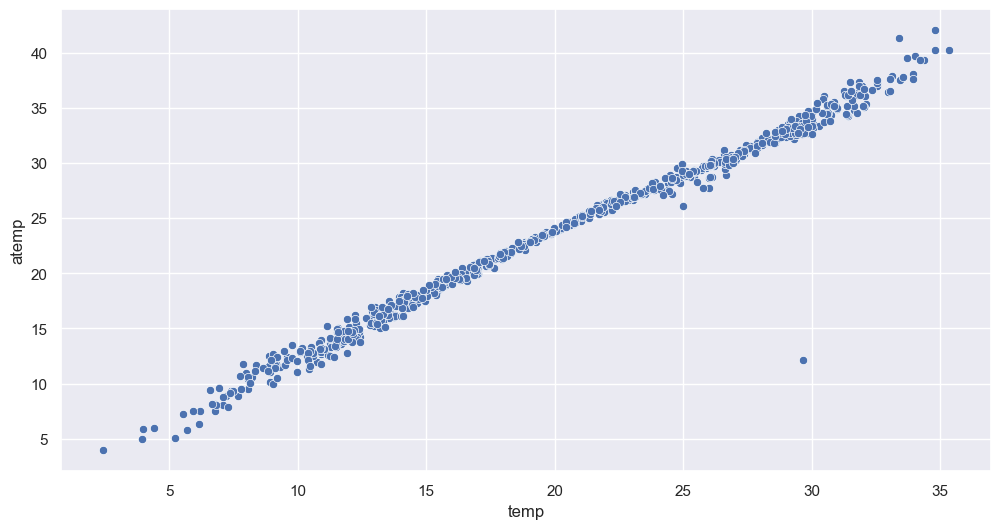

In [1151]:
plt.figure(figsize=(12, 6))
sns.scatterplot(day_data, x = "temp", y = "atemp")
plt.show()

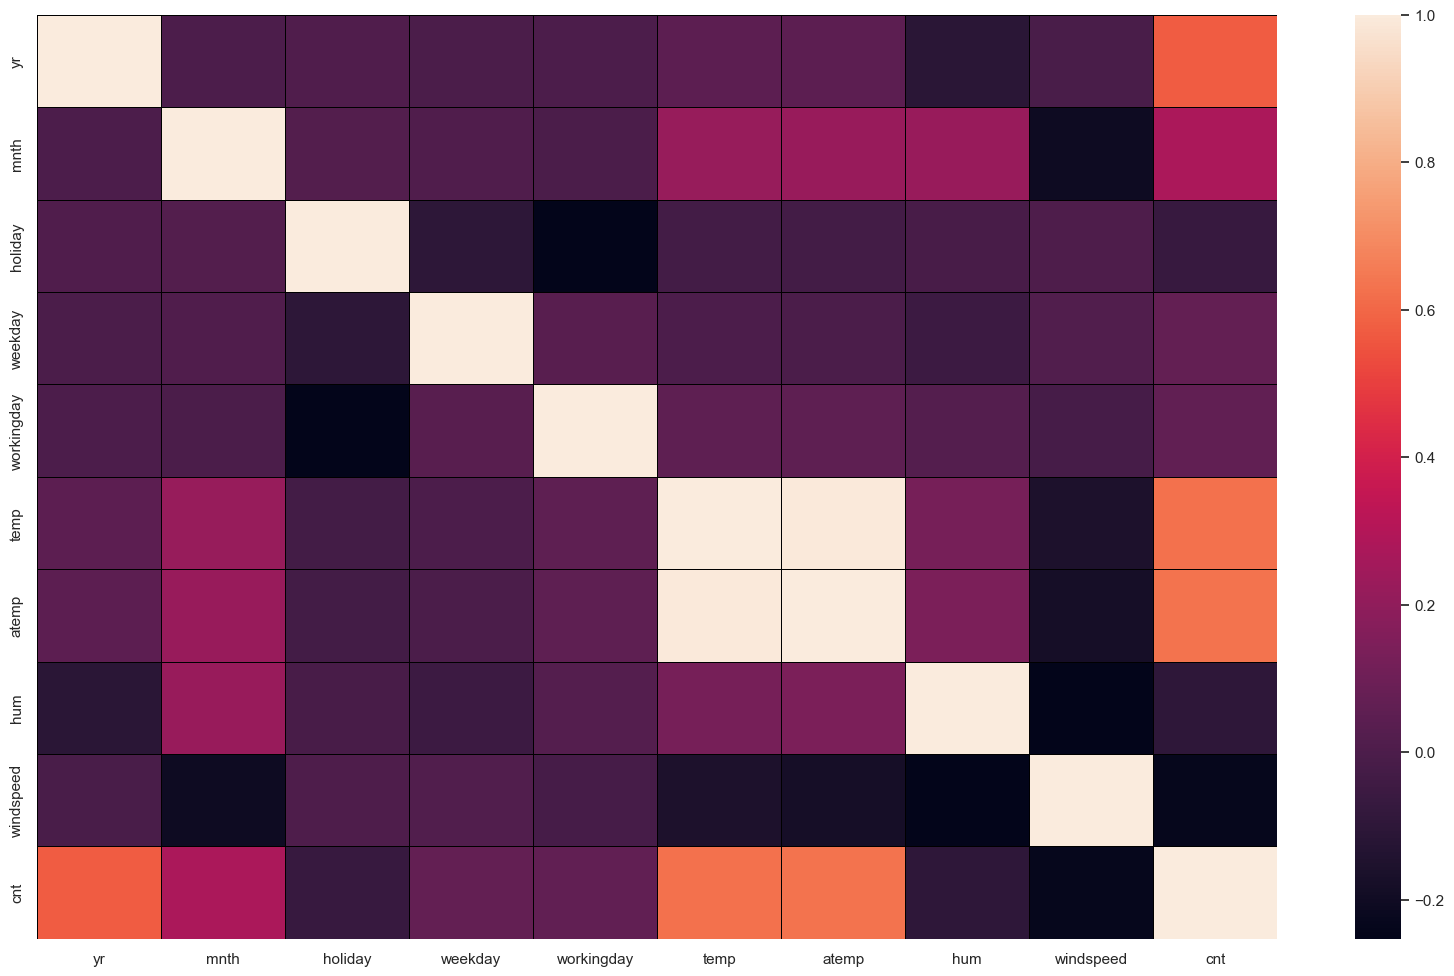

In [1152]:
plt.figure(figsize=(20, 12))
sns.heatmap(day_data.corr(numeric_only = True), linewidths = 0.5, linecolor = "black")
plt.show()

#### Lets create box plots to better understand the relationship between dependent and independent categorical variables.

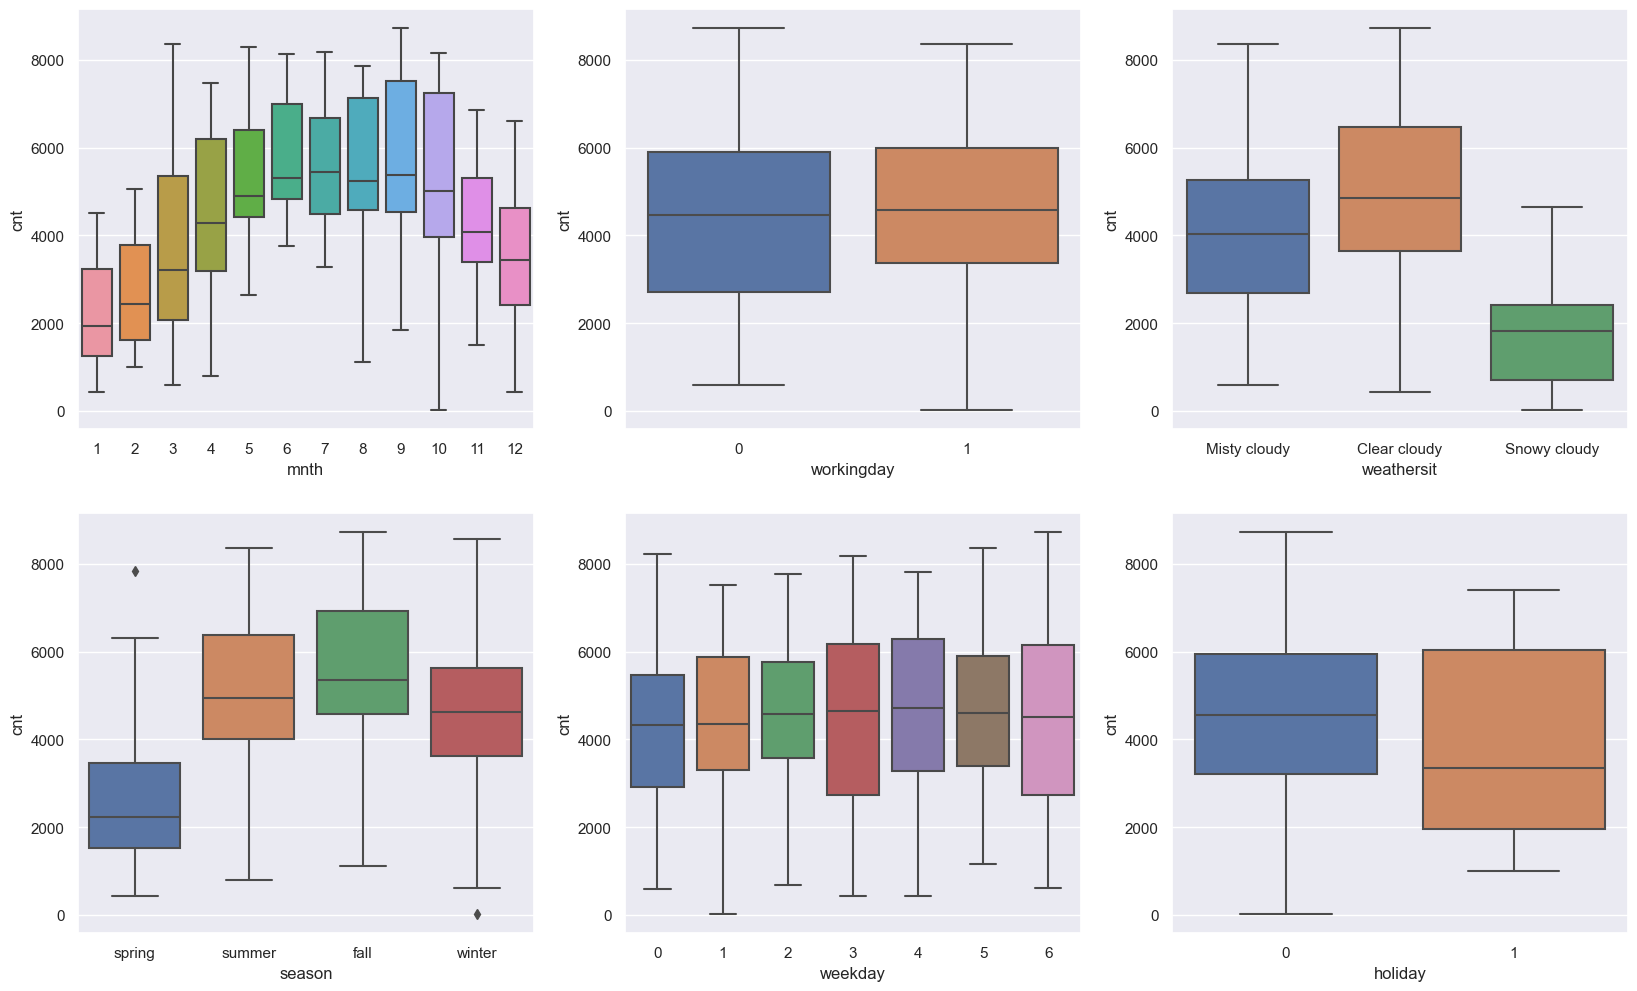

In [1153]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = day_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'workingday', y = 'cnt', data = day_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'season', y = 'cnt', data = day_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = day_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = day_data)
plt.show()

### Observations
1. From the above plots, we can see that there is some sort of relationship between `cnt` and various x variables like temperature, humidity, windspeed etc. This tells us that a linear regression model is applicable in this dataset.
2. The columns `temp` and `atemp` are very much similar as can be seen in the above plot. Given this high degree of correlation between the two, its best to use only one of these columns in model building. Since `atemp` represents the "feeling temperature" i.e. how hot or cold people really felt on that day, I feel that its a more accurate measure for model building and hence we'll using that in our model.
3. From the heatmap, we see that there is high correlation between `[cnt, yr]` and `[cnt, temperature]`.
4. Demand for rental bikes is generally high:
     - when weather is clear or partially cloudy, makes total sense as people wouldn't want to use bikes in misty or rainy weather.
     - in summer or fall season. Its lowest in spring as there is direct sunlight and temperatures are generally higher and winters as temperature is low.
     - in months which fall in summer or fall season.
     - on weekdays and working days.

# Model building

## Step 1: Data Preparation

### Dummy variables
The columns `season` and `weathersit` are categorical variables with multiple levels. These need to be converted to dummy integer columns.

In [1154]:
# Get the dummy variables for "season" and  "weathersit"
season_dummy = pd.get_dummies(day_data["season"], drop_first = True).astype(int)
weather_dummy = pd.get_dummies(day_data["weathersit"], drop_first = True).astype(int)

In [1155]:
print(season_dummy.shape)
print(weather_dummy.shape)

(730, 3)
(730, 2)


In [1156]:
# add these columns to day_data
day_data = pd.concat([day_data, season_dummy, weather_dummy], axis = 1)

In [1157]:
# remove season and weathersit columns from data
day_data = day_data.drop(["season", "weathersit"], axis = 1)
day_data.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Misty cloudy,Snowy cloudy
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


## Step 2: Train test split

In [1158]:
# Split the data into train and test through a 70:30 split.
train_data, test_data = train_test_split(day_data, train_size = 0.7, random_state = 1)
print(train_data.shape)
print(test_data.shape)

(510, 15)
(220, 15)


## Step 3: Rescale the features

Lets use min-max scaling to scale the numerical features

In [1159]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Apply scaler to all the columns except the "yes-no" and "dummy" variables
numeric_cols = ["mnth", "weekday", "temp", "atemp", "hum", "windspeed", "cnt"]

train_data[numeric_cols] = scaler.fit_transform(train_data[numeric_cols])

In [1160]:
train_data.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Misty cloudy,Snowy cloudy
135,0,0.363636,0,0.166667,1,0.656134,0.650070,0.743040,0.249252,0.452830,0,1,0,0,0
626,1,0.727273,0,0.500000,1,0.624490,0.636133,0.393272,0.459915,0.870801,0,0,0,0,0
554,1,0.545455,0,0.166667,1,0.824902,0.792844,0.597447,0.378326,0.753221,0,0,0,1,0
311,0,0.909091,0,0.333333,1,0.442008,0.459416,0.650812,0.111281,0.481247,0,0,1,0,0
312,0,0.909091,0,0.500000,1,0.431461,0.455049,0.701856,0.094959,0.470202,0,0,1,0,0


In [1161]:
# Lets look at min, max values of each column
train_data.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Misty cloudy,Snowy cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.503922,0.508200,0.031373,0.477451,0.682353,0.564793,0.557248,0.526474,0.400317,0.525079,0.219608,0.264706,0.250980,0.325490,0.031373
std,0.500476,0.308389,0.174494,0.333470,0.466018,0.226815,0.219147,0.194258,0.190021,0.218870,0.414387,0.441610,0.434003,0.469018,0.174494
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.372655,0.381278,0.379602,0.264072,0.382737,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.579661,0.585630,0.524942,0.371641,0.527266,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.795455,0.000000,0.833333,1.000000,0.757395,0.733434,0.668793,0.512950,0.680022,0.000000,1.000000,0.750000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All numerical variables are in the range [0, 1] after scaling.

### Divide the data into X and y.

In [1162]:
y_train = train_data.pop('cnt')
X_train = train_data

## Step 4: Model building

We will use a mix of automated and manual feature selection. First lets use RFE to get an initial list of features and then use p-value and VIF tests to eliminate the features.

In [1163]:
# Import RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

Running RFE with the output number of the variable equal to 12
Idea behind choosing 12 from 14 features is that `temp` and `atemp` have very high correlation, so we choose only one of them.
Secondly, from the above box plots we saw that bike rentals follow the same pattern with months and seasons. So, choosing only
one of them makes sense.

In [1164]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

rfe = RFE(lrm, n_features_to_select = 12)
rfe = rfe.fit(X_train, y_train)

In [1165]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 3),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Misty cloudy', True, 1),
 ('Snowy cloudy', True, 1)]

In [1166]:
rfe_supported_cols = X_train.columns[rfe.support_]
rfe_unsupported_cols = X_train.columns[~rfe.support_]

print(rfe_supported_cols)
print(rfe_unsupported_cols)

Index(['yr', 'holiday', 'weekday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Misty cloudy', 'Snowy cloudy'],
      dtype='object')
Index(['mnth', 'workingday'], dtype='object')


### Now lets use the RFE supported features to build a model using statsmodel package

In [1167]:
X_train_rfe = X_train[rfe_supported_cols]
X_train_rfe.head()

,yr,holiday,weekday,temp,atemp,hum,windspeed,spring,summer,winter,Misty cloudy,Snowy cloudy
135,0,0,0.166667,0.656134,0.650070,0.743040,0.249252,0,1,0,0,0
626,1,0,0.500000,0.624490,0.636133,0.393272,0.459915,0,0,0,0,0
554,1,0,0.166667,0.824902,0.792844,0.597447,0.378326,0,0,0,1,0
311,0,0,0.333333,0.442008,0.459416,0.650812,0.111281,0,0,1,0,0
312,0,0,0.500000,0.431461,0.455049,0.701856,0.094959,0,0,1,0,0


In [1168]:
# Import statsmodel package.
import statsmodels.api as sm

# Add constant to training data.
X_train_rfe = sm.add_constant(X_train_rfe)

In [1169]:
# Running the linear model
lrm = sm.OLS(y_train, X_train_rfe).fit()

In [1170]:
# Print model stats summary.
lrm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     180.8
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          1.51e-172
Time:                        22:35:48   Log-Likelihood:                 480.05
No. Observations:                 510   AIC:                            -934.1
Df Residuals:                     497   BIC:                            -879.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2411      0.034      7.080      0.000       0.174       0.308
yr               0.2339      0.009     27.094      0.000       0.217       0.251
holiday         -0.0623      0.025     -2.540      0.011      -0.111      -0.014
weekday          0.0524      0.013      4.079      0.000       0.027       0.078
temp             0.3178      0.138      2.305      0.022       0.047       0.589
atemp            0.1633      0.138      1.183      0.237      -0.108       0.435
hum             -0.1132      0.032     -3.536      0.000      -0.176      -0.050
windspeed       -0.1443      0.025     -5.808      0.000      -0.193      -0.095
spring          -0.0846      0.021     -3.988      0.000      -0.126      -0.043
summer           0.0372      0.014      2.724      0.007       0.010       0.064
winter           0.0712      0.017      4.102      0.000       0.037       0.105
Misty cloudy    -0.0374      0.012     -3.187      0.002      -0.060      -0.014
Snowy cloudy    -0.2236      0.029     -7.638      0.000      -0.281      -0.166
==============================================================================
Omnibus:                       66.250   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.101
Skew:                          -0.728   Prob(JB):                     1.03e-30
Kurtosis:                       5.093   Cond. No.                         77.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Variance Inflation Factor

In [1171]:
# Drop the const feature before calculating VIF.
X_train_vif = X_train_rfe.drop(["const"], axis = 1)

In [1172]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [1173]:
# Calculate the VIFs for the model
calculate_vif(X_train_vif)

,Features,VIF
3,temp,384.91
4,atemp,380.44
5,hum,15.70
6,windspeed,5.66
2,weekday,2.96
7,spring,2.89
9,winter,2.61
10,Misty cloudy,2.47
8,summer,2.14
0,yr,2.05


### Model observations
As seen in earlier scatter plots, `temp` and `atemp` have a very high VIF ~ 400. We should definitely drop one of these features.

Lets drop the `temp` feature.

In [1174]:
# Drop temp from features
X_train_rfe = X_train_rfe.drop(["temp"], axis = 1)

In [1175]:
# Run the model again.
lrm = sm.OLS(y_train, X_train_rfe).fit()
lrm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     195.1
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          1.46e-172
Time:                        22:35:48   Log-Likelihood:                 477.34
No. Observations:                 510   AIC:                            -930.7
Df Residuals:                     498   BIC:                            -879.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2520      0.034      7.443      0.000       0.185       0.319
yr               0.2342      0.009     27.020      0.000       0.217       0.251
holiday         -0.0592      0.025     -2.406      0.016      -0.108      -0.011
weekday          0.0545      0.013      4.234      0.000       0.029       0.080
atemp            0.4714      0.035     13.545      0.000       0.403       0.540
hum             -0.1123      0.032     -3.495      0.001      -0.175      -0.049
windspeed       -0.1356      0.025     -5.499      0.000      -0.184      -0.087
spring          -0.0980      0.020     -4.780      0.000      -0.138      -0.058
summer           0.0287      0.013      2.173      0.030       0.003       0.055
winter           0.0585      0.017      3.539      0.000       0.026       0.091
Misty cloudy    -0.0374      0.012     -3.174      0.002      -0.061      -0.014
Snowy cloudy    -0.2228      0.029     -7.577      0.000      -0.281      -0.165
==============================================================================
Omnibus:                       65.425   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.662
Skew:                          -0.699   Prob(JB):                     3.86e-32
Kurtosis:                       5.203   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1176]:
# calculate VIF again.
X_train_vif = X_train_rfe.drop(["const"], axis = 1)
calculate_vif(X_train_vif)

,Features,VIF
4,hum,15.63
3,atemp,11.41
5,windspeed,5.36
2,weekday,2.93
6,spring,2.72
9,Misty cloudy,2.47
8,winter,2.38
0,yr,2.04
7,summer,2.02
10,Snowy cloudy,1.48


In [1177]:
# We see that "hum" has the top VIF. lets drop it.
X_train_rfe = X_train_rfe.drop(["hum"], axis = 1)

In [1178]:
# Run the model again.
lrm = sm.OLS(y_train, X_train_rfe).fit()
lrm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     208.6
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          4.01e-171
Time:                        22:35:48   Log-Likelihood:                 471.16
No. Observations:                 510   AIC:                            -920.3
Df Residuals:                     499   BIC:                            -873.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2092      0.032      6.554      0.000       0.147       0.272
yr               0.2395      0.009     27.746      0.000       0.223       0.256
holiday         -0.0585      0.025     -2.353      0.019      -0.107      -0.010
weekday          0.0576      0.013      4.432      0.000       0.032       0.083
atemp            0.4428      0.034     12.945      0.000       0.376       0.510
windspeed       -0.1092      0.024     -4.600      0.000      -0.156      -0.063
spring          -0.1048      0.021     -5.080      0.000      -0.145      -0.064
summer           0.0255      0.013      1.917      0.056      -0.001       0.052
winter           0.0477      0.016      2.904      0.004       0.015       0.080
Misty cloudy    -0.0630      0.009     -6.758      0.000      -0.081      -0.045
Snowy cloudy    -0.2766      0.025    -10.923      0.000      -0.326      -0.227
==============================================================================
Omnibus:                       60.654   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.726
Skew:                          -0.674   Prob(JB):                     5.00e-28
Kurtosis:                       5.025   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1179]:
# calculate VIF again.
X_train_vif = X_train_rfe.drop(["const"], axis = 1)
calculate_vif(X_train_vif)

,Features,VIF
4,windspeed,5.19
3,atemp,4.57
2,weekday,2.93
5,spring,2.03
0,yr,2.01
6,summer,1.86
7,winter,1.66
8,Misty cloudy,1.49
9,Snowy cloudy,1.08
1,holiday,1.05


In [1180]:
# Drop windspeed as it has high VIF.
X_train_rfe = X_train_rfe.drop(["windspeed"], axis = 1)

In [1181]:
# Run the model again.
lrm = sm.OLS(y_train, X_train_rfe).fit()
lrm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     220.6
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          7.98e-168
Time:                        22:35:48   Log-Likelihood:                 460.57
No. Observations:                 510   AIC:                            -901.1
Df Residuals:                     500   BIC:                            -858.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1557      0.030      5.136      0.000       0.096       0.215
yr               0.2379      0.009     27.045      0.000       0.221       0.255
holiday         -0.0596      0.025     -2.351      0.019      -0.109      -0.010
weekday          0.0585      0.013      4.413      0.000       0.032       0.085
atemp            0.4613      0.035     13.316      0.000       0.393       0.529
spring          -0.1078      0.021     -5.125      0.000      -0.149      -0.066
summer           0.0207      0.014      1.527      0.127      -0.006       0.047
winter           0.0542      0.017      3.248      0.001       0.021       0.087
Misty cloudy    -0.0613      0.010     -6.450      0.000      -0.080      -0.043
Snowy cloudy    -0.2892      0.026    -11.263      0.000      -0.340      -0.239
==============================================================================
Omnibus:                       62.196   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.289
Skew:                          -0.670   Prob(JB):                     2.54e-30
Kurtosis:                       5.148   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1182]:
# calculate VIF again.
X_train_vif = X_train_rfe.drop(["const"], axis = 1)
calculate_vif(X_train_vif)

,Features,VIF
3,atemp,3.44
2,weekday,2.91
0,yr,2.00
5,summer,1.65
6,winter,1.52
7,Misty cloudy,1.49
4,spring,1.46
8,Snowy cloudy,1.06
1,holiday,1.05


Now since all features have p-value <= 0.05 and VIF <= 5, we can stop dropping further features and this is our final 
model.

### Residual analysis on training data

In [1183]:
y_train_cnt = lrm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

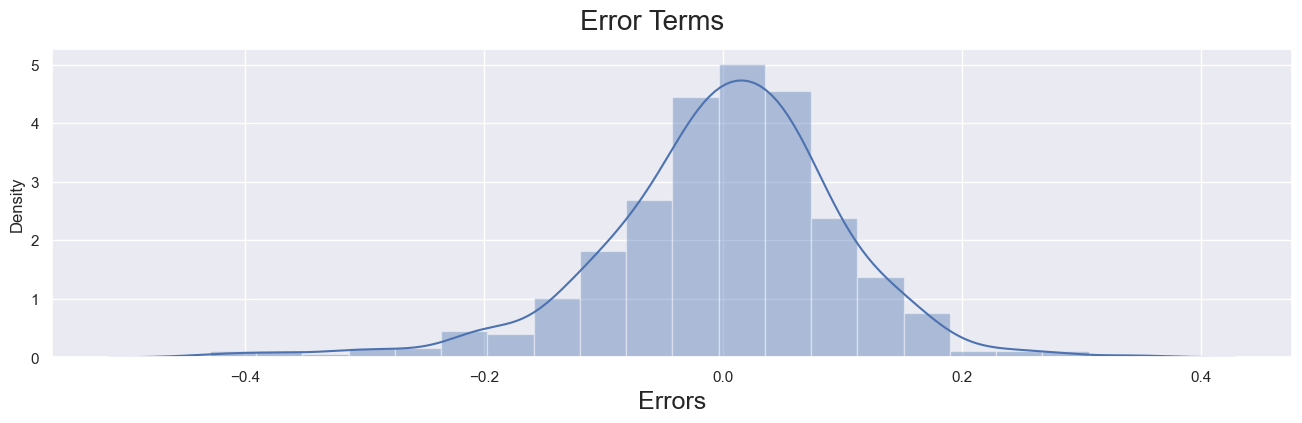

In [1184]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle("Error Terms", fontsize = 20)
plt.xlabel("Errors", fontsize = 18)

Text(0.5, 1.0, 'Residuals vs fitted values plot')

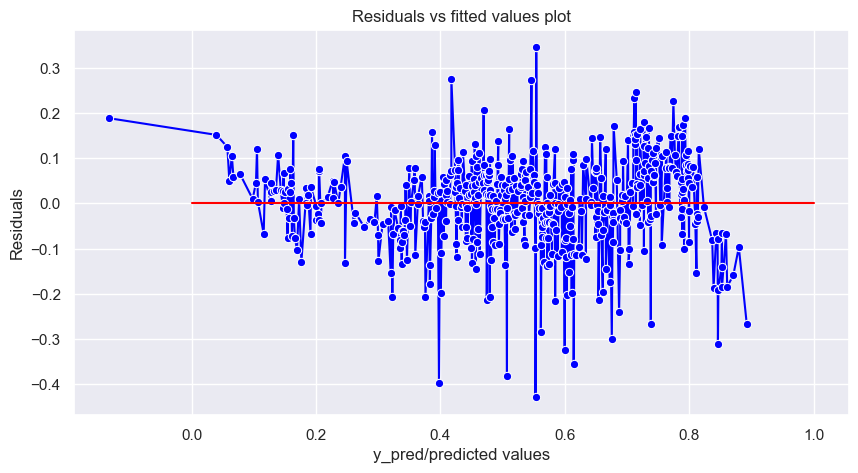

In [1185]:
# ResidualPlots on training data
plt.figure(figsize=(10,5))
sns.lineplot(x = y_train_cnt, y = y_train - y_train_cnt, marker = "o", color = "blue")
plt.xlabel("y_pred/predicted values")
plt.ylabel("Residuals")
sns.lineplot(x = [0,1],y = [0,0],color = "red")
plt.title("Residuals vs fitted values plot")

We can see that error terms follow a normal distribution.

## Making predictions on test data
Lets run the model on test data and see how well it performs on the test data

### Step 1: Apply scaling on test data

In [1186]:
test_data[numeric_cols] = scaler.transform(test_data[numeric_cols])
test_data.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Misty cloudy,Snowy cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.490909,0.488843,0.022727,0.550758,0.686364,0.523860,0.517582,0.504768,0.402761,0.495310,0.309091,0.222727,0.227273,0.363636,0.022727
std,0.501057,0.325854,0.149373,0.331539,0.465029,0.240908,0.235474,0.206717,0.173235,0.230612,0.463173,0.417026,0.420026,0.482143,0.149373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.048429,0.051165,-0.353829,0.057872,0.069144,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.333333,0.000000,0.303531,0.304904,0.350493,0.285446,0.318540,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,0.500000,1.000000,0.514263,0.521185,0.510441,0.387208,0.479579,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.747111,0.720594,0.648637,0.488116,0.686925,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.015822,1.050480,0.968097,1.157215,0.937069,1.000000,1.000000,1.000000,1.000000,1.000000


### Step 2: Divide into X and y

In [1187]:
y_test = test_data.pop("cnt")
X_test = test_data

### Step 3: Bring test data columns in parity with training data

In [1188]:
# Remove const column from X_train_rfe
X_train_temp = X_train_rfe.drop(["const"], axis = 1)
X_test_new = X_test[X_train_temp.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

### Step 4: Run model on test data

In [1189]:
# Making predictions
y_pred = lrm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

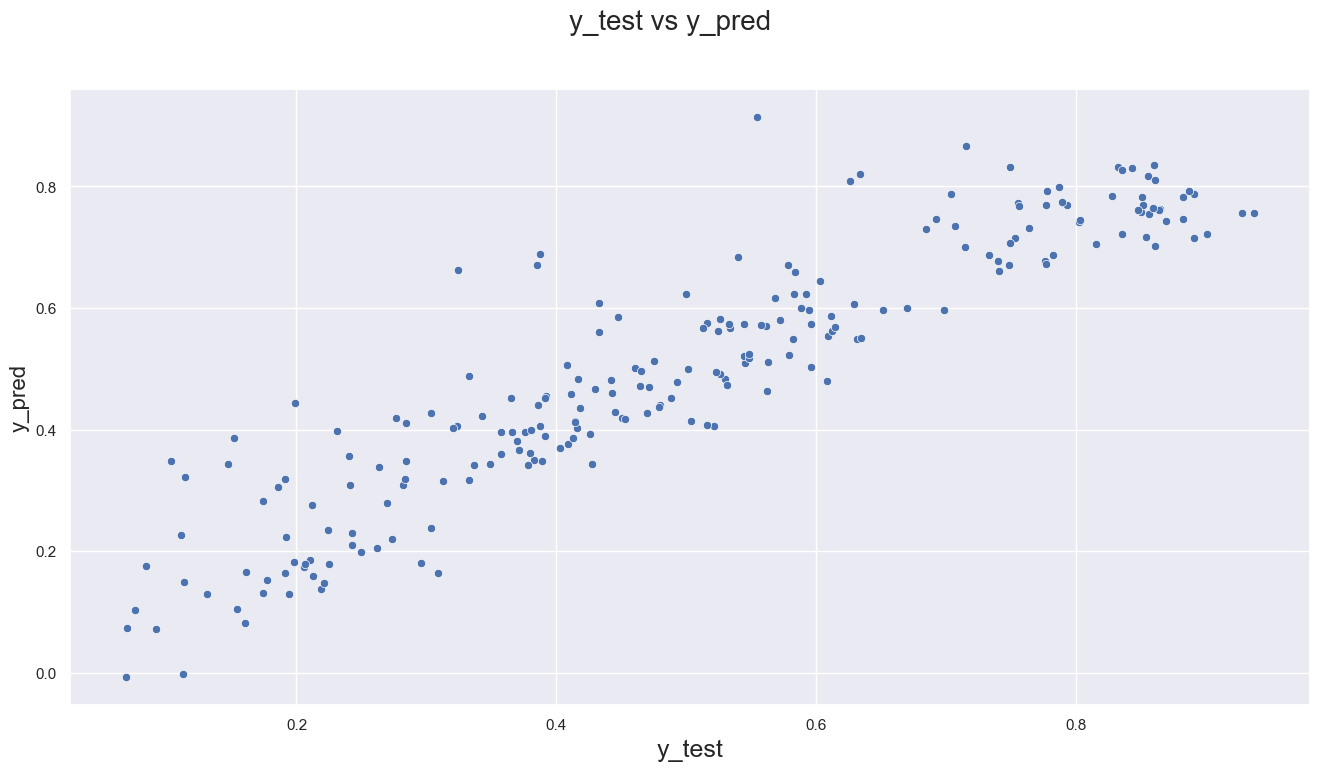

In [1190]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(16, 8))
sns.scatterplot(x = y_test, y = y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0.5, 0, 'Errors')

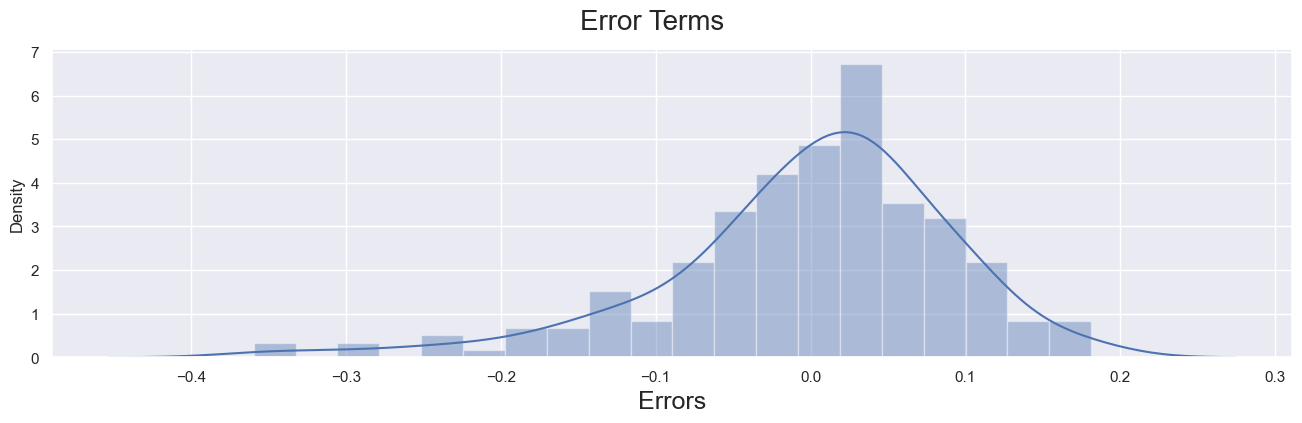

In [1191]:
# Plot the histogram of the test data error terms
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle("Error Terms", fontsize = 20)
plt.xlabel("Errors", fontsize = 18)

In [1192]:
# Calculate r2_score on the test set
from sklearn.metrics import r2_score
r2_score(y_test, y_pred).round(2)

0.84

#### We have got r2_score of 0.84 on test data which indicates that our model has performed really well on test data.